In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rdir = '/media/chris/kinoto/indicators/connectivity_paper/256/'
D = [2, 3]
lc = [3, 4]
ec = [1, 2, 3]
ecN = ['ICS', 'HCS', 'LCS']
pi = 20
L = 256

folderD = [['2D_ind_256_lc3/', '2D_ind_256_lc4/'], ['3D_ind_256_lc3/', '3D_ind_256_lc4/']]

In [4]:
### Data as numpy array ###

ind = np.load(rdir + folderD[0][0] + '0' + '/GlobalConnectivityMetrics/' + '32.npy', allow_pickle=True)
d = ind.item()

for x, y in d.items():
    print(x, y.shape)

colapse = np.array([y for x, y in d.items()]) # "list comprehension: colapso de las key de diccionario, se eliminan las keys.
col = np.squeeze(colapse, axis=3)
print(col.shape)
print('-----------------------------------------------------------------------------')
print(col)
print('-----------------------------------------------------------------------------')

print('Object class: ', type(ind), ind[()])
print('-----------------------------------------------------------------------------')

print('Object :', ind)
print('-----------------------------------------------------------------------------')

print(ind.item().keys())
print('-----------------------------------------------------------------------------')

print(ind.item().values())
print('-----------------------------------------------------------------------------')

print((ind.item().get('npy')).shape)
print('-----------------------------------------------------------------------------')

print(ind.item().items())
print('-----------------------------------------------------------------------------')

d = ind[()]['PPHA']  # [()] == .item() --> d = ind.item()['PPHA']

print('The PPHA ind value is:', d,'; ', 'and shape :', d.shape)
print('-----------------------------------------------------------------------------')

for key, value in ind.item().items():
    print(key,': ', value)
print('-----------------------------------------------------------------------------')

PPHA (8, 8, 1)
VOLALE (8, 8, 1)
ZNCC (8, 8, 1)
GAMMA (8, 8, 1)
spanning (8, 8, 1)
npz (8, 8, 1)
npy (8, 8, 1)
npx (8, 8, 1)
Plen (8, 8, 1)
S (8, 8, 1)
P (8, 8, 1)
PlenX (8, 8, 1)
SX (8, 8, 1)
PX (8, 8, 1)
(14, 8, 8)
-----------------------------------------------------------------------------
[[[8.39843750e-02 1.02539062e-01 1.16210938e-01 1.01562500e-01
   7.03125000e-02 1.41601562e-01 1.28906250e-01 1.41601562e-01]
  [1.25976562e-01 1.06445312e-01 1.13281250e-01 1.06445312e-01
   1.45507812e-01 1.11328125e-01 1.44531250e-01 1.07421875e-01]
  [1.31835938e-01 7.42187500e-02 9.17968750e-02 1.04492188e-01
   1.04492188e-01 7.91015625e-02 6.44531250e-02 1.16210938e-01]
  [8.10546875e-02 9.37500000e-02 6.34765625e-02 8.69140625e-02
   9.08203125e-02 1.25000000e-01 1.25976562e-01 9.86328125e-02]
  [9.08203125e-02 8.49609375e-02 6.73828125e-02 9.86328125e-02
   1.11328125e-01 5.37109375e-02 7.51953125e-02 1.21093750e-01]
  [1.14257812e-01 1.27929688e-01 1.26953125e-01 9.37500000e-02
   8.203

In [3]:
### Data as Pandas DataFrame ###

df_ind = pd.DataFrame(ind.item().items(), columns = ['Indicator', 'Value'])
print(df_ind)
print('-----------------------------------------------------------------------------')

df_ind = df_ind.set_index('Indicator')
print(df_ind.head())
print('-----------------------------------------------------------------------------')

df_ind = df_ind.reset_index()
print(df_ind.head())


print('-----------------------------------------------------------------------------')

for i, j in df_ind.iterrows():
    print(j)
print('-----------------------------------------------------------------------------')

   Indicator                        Value
0       PPHA      [[[0.100006103515625]]]
1     VOLALE   [[[0.005797985962770827]]]
2       ZNCC                 [[[2476.0]]]
3      GAMMA  [[[0.0012497289018095158]]]
4   spanning                    [[[0.0]]]
5        npz                    [[[0.0]]]
6        npy                    [[[0.0]]]
7        npx                    [[[0.0]]]
8       Plen     [[[2.1195545419625526]]]
9          S      [[[2.647011308562197]]]
10         P                    [[[0.0]]]
11     PlenX     [[[2.1195545419625526]]]
12        SX      [[[2.647011308562197]]]
13        PX                    [[[0.0]]]
-----------------------------------------------------------------------------
                                 Value
Indicator                             
PPHA           [[[0.100006103515625]]]
VOLALE      [[[0.005797985962770827]]]
ZNCC                      [[[2476.0]]]
GAMMA      [[[0.0012497289018095158]]]
spanning                     [[[0.0]]]
-------------------

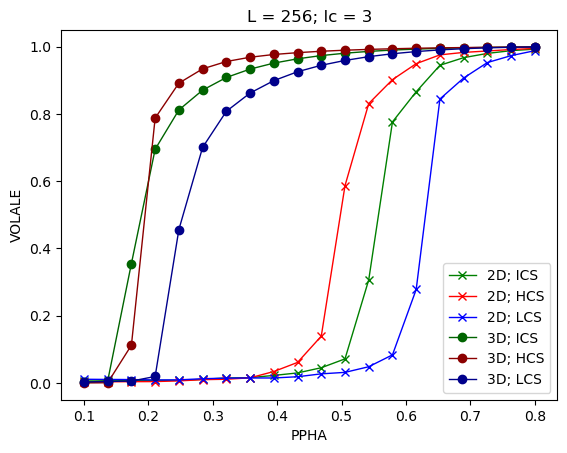

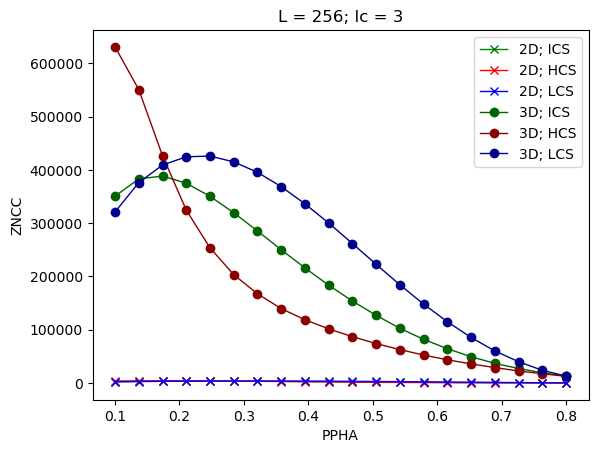

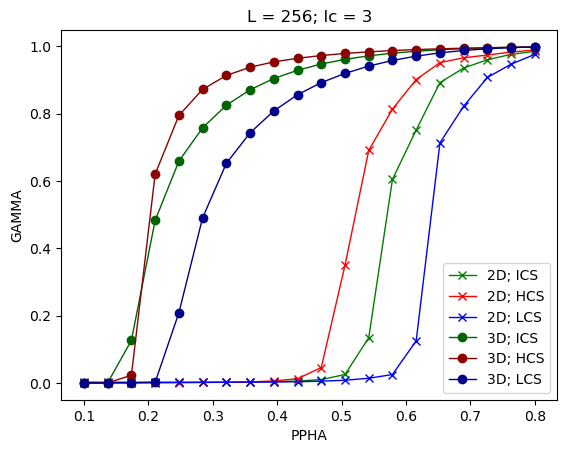

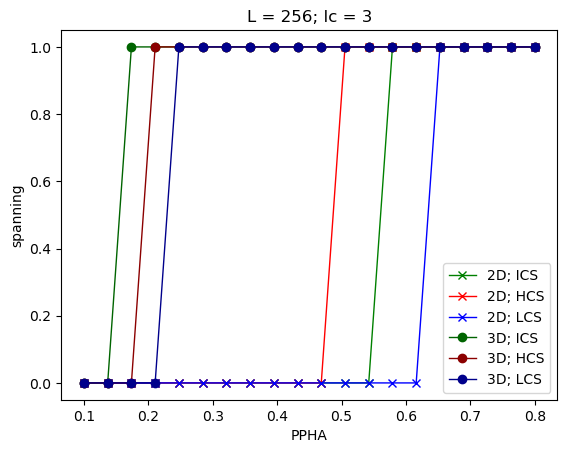

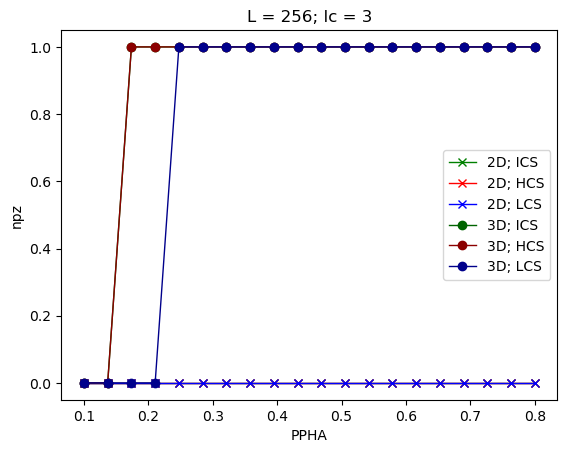

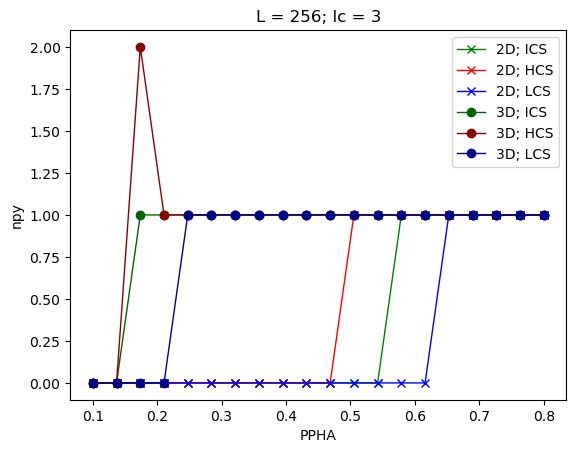

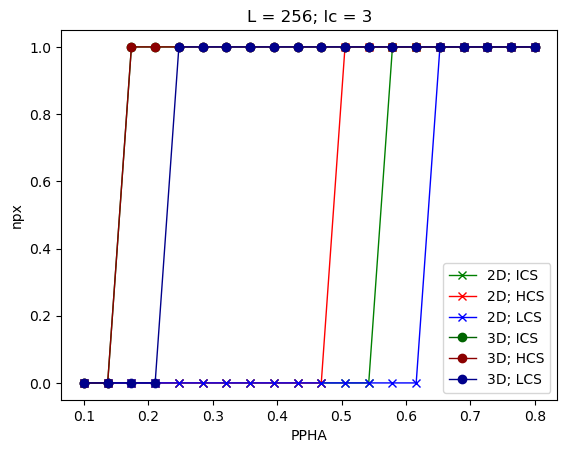

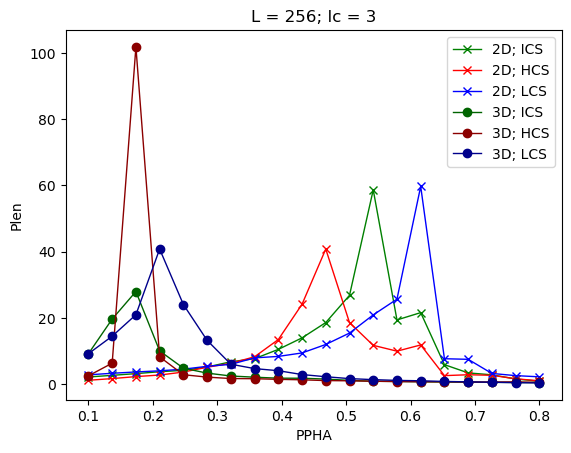

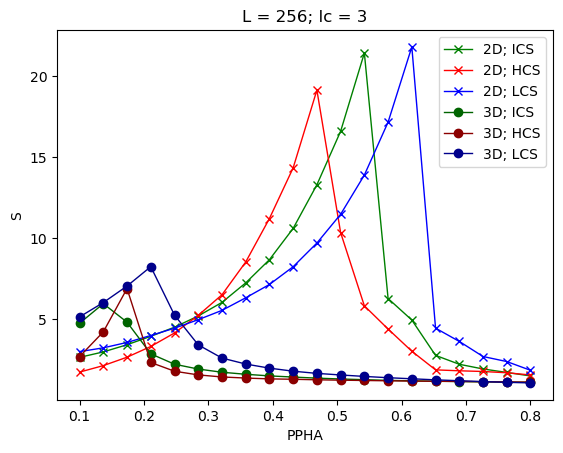

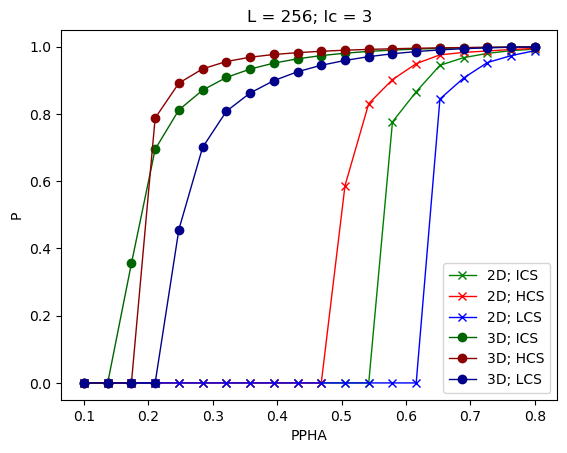

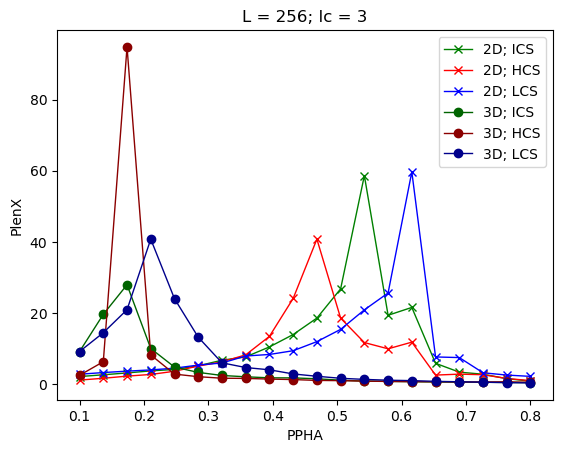

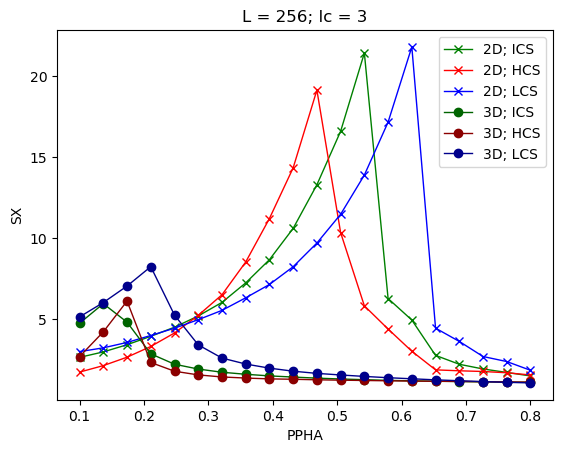

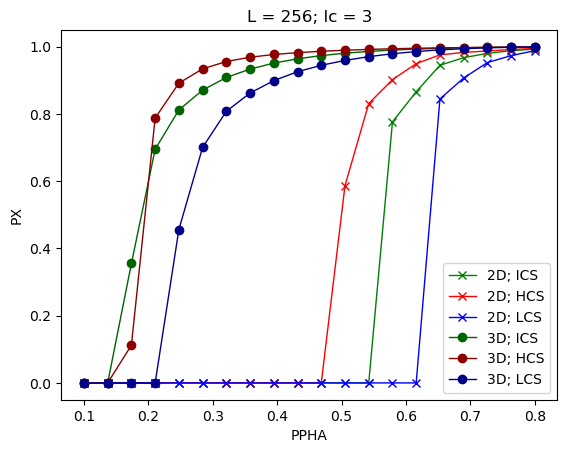

In [8]:
### Indicators vs PPHA ###
### L = 256 ###

inds = ['PPHA', 'VOLALE', 'ZNCC', 'GAMMA', 'spanning', 'npz', 'npy', 'npx', 'Plen', 'S', 'P', 'PlenX', 'SX', 'PX']

yinds = inds[1:len(inds)+1]
xind = np.linspace(0.1,0.8,20)
# x1 = inds[0]
# x2 = np.linspace(0.1, 0.8, 20)

x, y = np.zeros((pi)), np.zeros((pi))

color = [['green', 'red', 'blue'], ['darkgreen', 'darkred', 'darkblue']]
marker = ['x', 'o']

for yind in yinds:
    for iD in range(len(D)):
        for iec in range(len(ec)):
            for ipi in range(pi):
                res = np.load(rdir + folderD[iD][0] + str(ipi+(pi*iec)) + '/ConnectivityMetrics/' + '256.npy', allow_pickle=True).item()
                x[ipi] = xind[ipi]
                y[ipi] = np.squeeze(res[yind])
            plt.plot(x, y, label=str(D[iD])+'D'+'; '+ecN[iec], color=color[iD][iec], marker=marker[iD], markersize=6, lw=1)
            plt.legend()
            plt.xlabel('PPHA')
            plt.ylabel(yind)
            plt.title('L = 256' + '; ' + 'lc = 3')
    plt.show()